In [1]:
!pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/332.0 MB 493.8 kB/s eta 0:11:12
   ---------------------------------------- 0.5/332.0 MB 493.8 kB/s eta 0:11:12
   ---------------------------------------- 0.8/332.0 MB 541.0 kB/s eta 0:10:13
   ---------------------------------------- 0.8/332.0 MB 541.0 kB/s eta 0:10:13
   ---------------------------------------- 0.8/332.0 MB 541.0 kB/s eta 0:10:13
   ---------------------------------------- 1.0/332.0 MB 514.4 kB/s eta 0:10:44
   ---------------------------------------- 1.0/332.0 MB 514.4 kB/s eta 0:10:44
   -----------

In [4]:
!pip install keras

In [5]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -------- ------------------------------- 1.8/8.7 MB 10.2 MB/s eta 0:00:01
   ---------------------- ----------------- 5.0/8.7 MB 12.8 MB/s eta 0:00:01
   ------------------------------------ --- 7.9/8.7 MB 13.4 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 13.4 MB/s  0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   -- ------------------------------------- 2.9/38.5 MB 14.0 MB/s eta 0:00:03
   ------ --------------------------------- 6.3/38.5 MB 14.9 MB/s eta 0:00:03
   -------- ------------------------------- 8.4/38.5 MB 13.7 MB/s eta 0:00:03
   ---------- ----------------------------- 10.5/38.5 MB 12.8 MB/s eta 0:00:03
   -------------- ------------------------- 14.2/38.5 MB 13.8 MB/s eta 0:00:02
   ----------------- ---------------------- 17.3/38.5 MB 13.9 MB/s eta 0:00:02
   ------------------- -------------------- 18.6/38.5 MB 13.8 MB/s eta 0:00:02
   ---

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [8]:
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()

X = X.astype('float32') / 255.0
X = X.reshape(-1, 28*28)
y = to_categorical(y, num_classes=10)

X_test = X_test.astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28)

y_test = to_categorical(y_test, num_classes=10)

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Forma de X: (60000, 784)
Forma de y: (60000, 10)
Forma de X_test: (10000, 784)
Forma de y_test: (10000, 10)


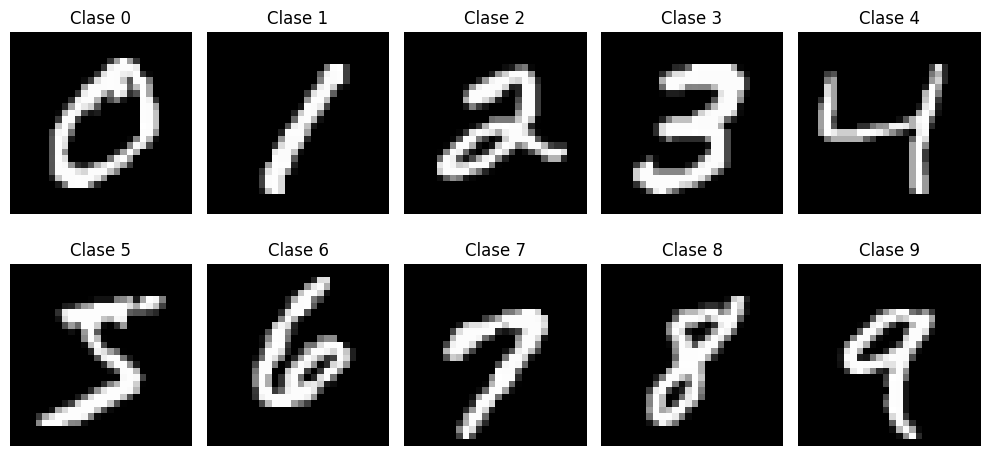

In [9]:
#Mueetra una imagen de cada categoria
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(X[y[:, i] == 1][0].reshape(28, 28), cmap='gray')
    ax.set_title(f'Clase {i}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [10]:
#Defina la funcion que crea el modelo MLP con keras
def create_mlp_model(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [12]:
#Entrena un modelo con los datos de entrenamiento
model = create_mlp_model(input_dim=28*28, num_classes=10)
model.summary ()
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.9196 - loss: 0.2724 - val_accuracy: 0.9589 - val_loss: 0.1409
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.9645 - loss: 0.1170 - val_accuracy: 0.9668 - val_loss: 0.1154
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 0.9748 - loss: 0.0805 - val_accuracy: 0.9704 - val_loss: 0.0982
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - accuracy: 0.9812 - loss: 0.0609 - val_accuracy: 0.9688 - val_loss: 0.0980
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.9858 - loss: 0.0463 - val_accuracy: 0.9696 - val_loss: 0.1046
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - accuracy: 0.9880 - loss: 0.0374 - val_accuracy: 0.9692 - val_loss: 0.1167
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.9909 - loss: 0.0283 - val_accuracy: 0.9750 - val_loss: 0.0948
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - accuracy: 0.9918 -

In [13]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.95      0.99      0.97      1028
           8       0.98      0.95      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

